In [7]:
root="./logs/compareAllAttacks/cifar_dirichlet/"
# root="./logs/netRes_experiments/dirichlet/"
# root="./logs/netRes_experiments/cifar_iid/"


In [10]:
import os
import numpy as np
import pandas as pd

from collections import defaultdict
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator


def tabulate_events(dpath):
    
    print(dpath)

    summary_iterators = [EventAccumulator(os.path.join(dpath, dname)).Reload() for dname in os.listdir(dpath) if 'csv' not in dname]
    tags = summary_iterators[1].Tags()['scalars']
    print(tags)
    summary_iterators=[it for it in summary_iterators if it.Tags()['scalars'] == tags]
    for it in summary_iterators:
        assert it.Tags()['scalars'] == tags

    out = defaultdict(list)
    steps = []

    for tag in tags:
        steps = [e.step for e in summary_iterators[0].Scalars(tag)]

        for events in zip(*[acc.Scalars(tag) for acc in summary_iterators]):
            assert len(set(e.step for e in events)) == 1

            out[tag].append([e.value for e in events])

    return out, steps

dict1={}
def to_csv(dpath):
    dirs = os.listdir(dpath)
#     print(dirs)
    d, steps = tabulate_events(dpath)
    tags, values = zip(*d.items())

    np_values = np.array(values)
#     print(tags,values)
    
    for index, tag in enumerate(tags):
    
        df = pd.DataFrame(np_values[index], index=steps[:np_values[index].shape[0]], columns=dirs)
        file_name = tag.replace("/", "_") + '.csv'
        folder_path = os.path.join(dpath, 'csv')
        dict1[os.path.join(folder_path, file_name)]=df


def get_file_path(dpath, tag):
    file_name = tag.replace("/", "_") + '.csv'
    folder_path = os.path.join(dpath, 'csv')
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
    return os.path.join(folder_path, file_name)


# if __name__ == '__main__':
#     root="./logs/netRes_experiments/cifar_dirichlet/"
    

paths=sorted([os.path.join(root,dname) for dname in os.listdir(root)])
# paths=[i for i in paths if not 'attack' in i.lower()]
#     paths=[i for i in path if 'csv' not in i]
for path in paths:
    print(path)
#     try:
    to_csv(path)
#     except:
#         continue

./logs/compareAllAttacks/cifar_dirichlet/No_Attack(0)
./logs/compareAllAttacks/cifar_dirichlet/No_Attack(0)
['test/loss', 'test/accuracy']
./logs/compareAllAttacks/cifar_dirichlet/No_Attack(1)
./logs/compareAllAttacks/cifar_dirichlet/No_Attack(1)
['test/loss', 'test/accuracy']
./logs/compareAllAttacks/cifar_dirichlet/No_Attack(2)
./logs/compareAllAttacks/cifar_dirichlet/No_Attack(2)
['test/loss', 'test/accuracy']
./logs/compareAllAttacks/cifar_dirichlet/backdoor_1(0)
./logs/compareAllAttacks/cifar_dirichlet/backdoor_1(0)
['test/loss', 'test/accuracy', 'test/loss_backdoor', 'test/backdoor_success_rate']
./logs/compareAllAttacks/cifar_dirichlet/backdoor_1(1)
./logs/compareAllAttacks/cifar_dirichlet/backdoor_1(1)
['test/loss', 'test/accuracy', 'test/loss_backdoor', 'test/backdoor_success_rate']
./logs/compareAllAttacks/cifar_dirichlet/backdoor_1(2)
./logs/compareAllAttacks/cifar_dirichlet/backdoor_1(2)
['test/loss', 'test/accuracy', 'test/loss_backdoor', 'test/backdoor_success_rate']
./lo

['test/loss', 'test/accuracy', 'test/loss_backdoor', 'test/backdoor_success_rate']
./logs/compareAllAttacks/cifar_dirichlet/semanticBackdoor_4(1)
./logs/compareAllAttacks/cifar_dirichlet/semanticBackdoor_4(1)
['test/loss', 'test/accuracy', 'test/loss_backdoor', 'test/backdoor_success_rate']
./logs/compareAllAttacks/cifar_dirichlet/semanticBackdoor_4(2)
./logs/compareAllAttacks/cifar_dirichlet/semanticBackdoor_4(2)
['test/loss', 'test/accuracy', 'test/loss_backdoor', 'test/backdoor_success_rate']


In [11]:
len(dict1.keys())

150

In [12]:
# import os
# allfiles=[os.path.join(dp, f) for dp, dn, fn in os.walk(os.path.expanduser("./logs")) for f in fn]

In [13]:
allfiles=sorted(dict1.keys())

In [14]:
allcsv=[i for i in allfiles if 'test_accuracy.csv' in i]
len(allcsv)

51

In [23]:
def getSortedColumnsDF(DF):
    order=['fedavg','median', 'gm', 'mkrum']
#['fedavg','median','baseline','aggNet_noMedian','aggNetResidual','aggNetBlocks','aggNetBlocksMultiple','aggNetBlockNormalize','aggNetBlocks_dataAugment']
    order=dict(zip(order,range(len(order))))
    DF=DF.reindex([v for i,v in sorted(zip([order[i] for i in DF.columns],DF.columns))], axis=1)
    return DF

In [24]:
allcsv=[i for i in allfiles if 'test_accuracy.csv' in i]

In [ ]:
import pandas as pd
j=0
concatAll=pd.DataFrame()
for i in sorted(allcsv):
    DF=dict1[i]
    DF=getSortedColumnsDF(DF)
    title=i.split('/')[4]
    fig=DF.plot(title=title)
    fig.set(xlabel='commnication rounds', ylabel='Accuracy')
    fig.get_figure().savefig(f"./results/acc/{title}.svg")
    concatAll[title]=DF.iloc[-1]
concatAll.to_csv(f"./results/acc/summary.csv")

In [27]:
concatAll

,No_Attack(0),No_Attack(1),No_Attack(2),backdoor_1(0),backdoor_1(1),backdoor_1(2),backdoor_2(0),backdoor_2(1),backdoor_2(2),backdoor_3(0),...,semanticBackdoor_1(2),semanticBackdoor_2(0),semanticBackdoor_2(1),semanticBackdoor_2(2),semanticBackdoor_3(0),semanticBackdoor_3(1),semanticBackdoor_3(2),semanticBackdoor_4(0),semanticBackdoor_4(1),semanticBackdoor_4(2)
fedavg,75.820000,75.919998,74.440002,75.089996,75.099998,75.889999,74.720001,74.510002,74.110001,74.040001,...,74.209999,71.339996,72.150002,70.580002,63.910000,70.269997,63.040001,62.520000,64.529999,64.440002
median,74.059998,73.290001,74.160004,73.110001,73.730003,73.059998,73.459999,73.750000,73.870003,73.330002,...,71.760002,70.889999,71.260002,71.379997,67.029999,68.510002,69.419998,61.240002,61.750000,61.169998
gm,74.540001,75.459999,74.699997,74.139999,74.730003,74.639999,73.720001,74.480003,74.900002,73.769997,...,70.300003,51.419998,53.250000,50.200001,22.030001,23.330000,20.680000,10.630000,10.960000,11.060000
mkrum,67.190002,67.209999,66.360001,65.690002,65.839996,65.410004,65.830002,60.299999,65.400002,67.370003,...,69.050003,68.910004,63.619999,67.349998,32.700001,31.170000,21.490000,10.000000,10.000000,10.000000


In [28]:
allcsv=[i for i in allfiles if 'test_backdoor_success_rate.csv' in i]

/home/patrick/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/home/patrick/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/home/patrick/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot i

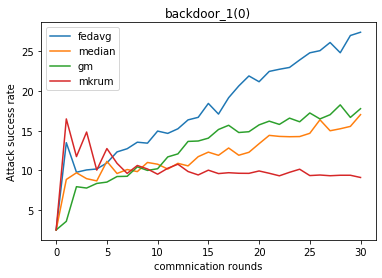

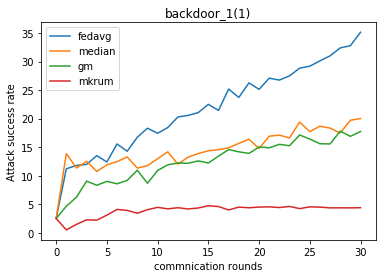

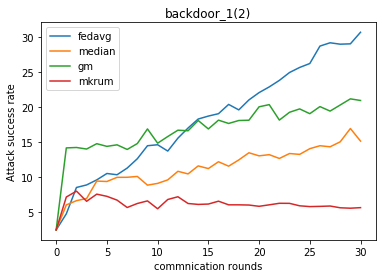

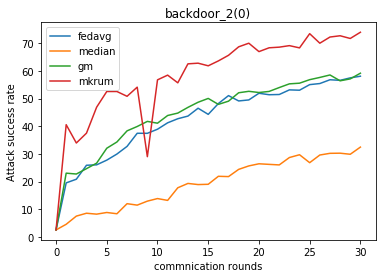

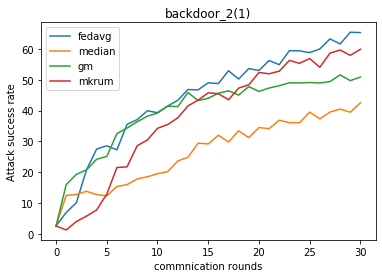

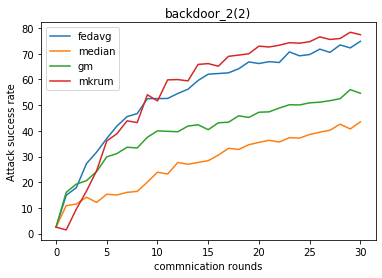

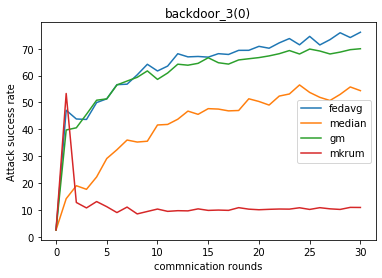

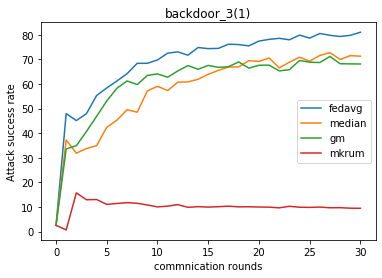

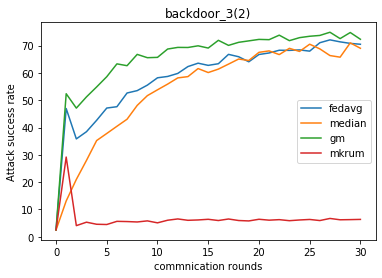

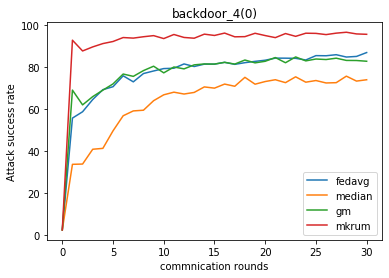

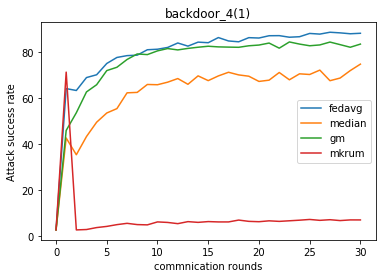

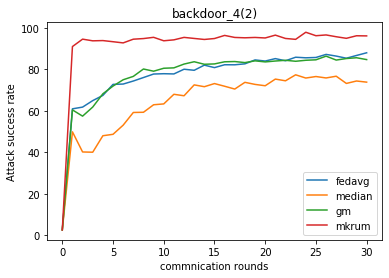

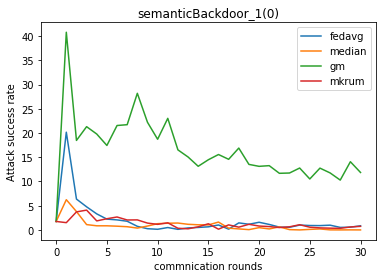

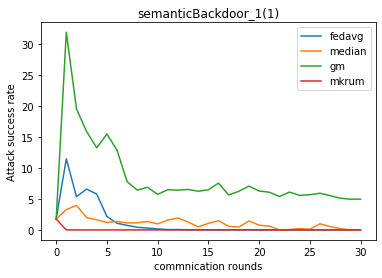

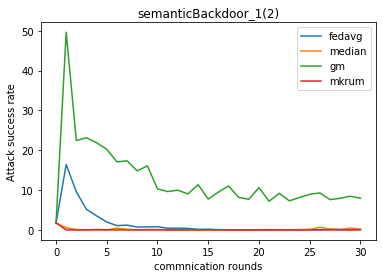

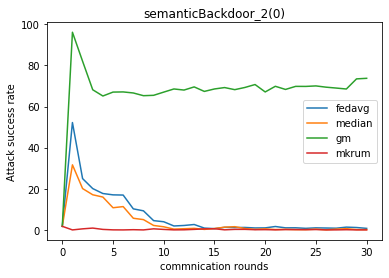

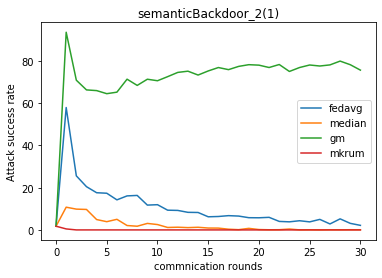

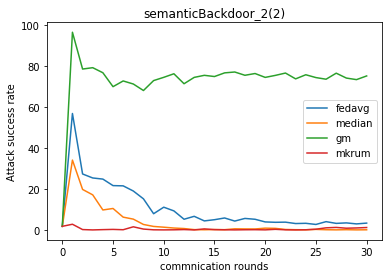

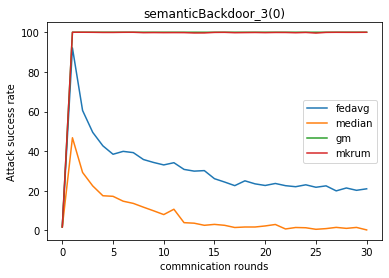

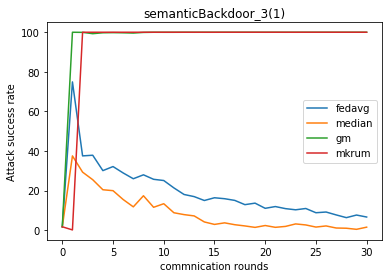

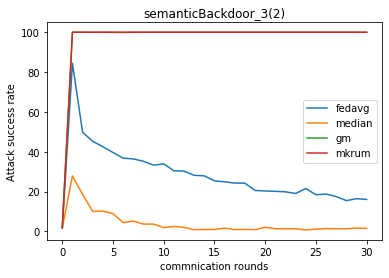

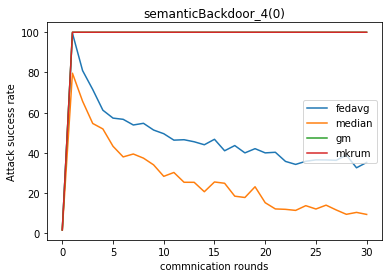

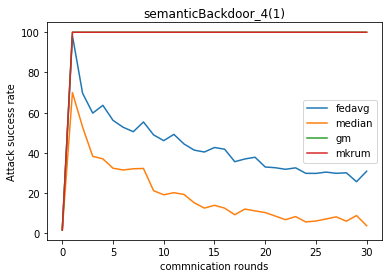

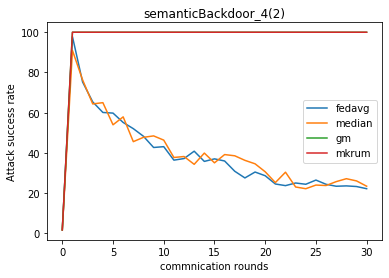

In [29]:
import pandas as pd
j=0
concatAll=pd.DataFrame()
for i in sorted(allcsv):
    DF=dict1[i]
    DF=getSortedColumnsDF(DF)
    title=i.split('/')[4]
    fig=DF.plot(title=title)
    fig.set(xlabel='commnication rounds', ylabel='Attack success rate')
    fig.get_figure().savefig(f"./results/asr/{title}.svg")
    concatAll[title]=DF.iloc[-1]
concatAll.to_csv(f"./results/asr/summary.csv")

In [23]:
# import matplotlib.pyplot as plt

# def plot(xdata,ydata,xlabel,ylabel,title,savepath):
#     _,ax=plt.subplots(figsize=(6,6))
#     plt.scatter(xdata,ydata)
#     plt.xlabel(xlabel)
#     plt.ylabel(ylabel)
#     plt.title(title)
#     sup=max(ax.get_xlim()[1],ax.get_ylim()[1])
#     inf=min(ax.get_xlim()[0],ax.get_ylim()[0])
#     plt.plot([inf, sup], [inf, sup], ls = "--",c =".3")
#     plt.savefig(savepath)
# plot(a,b,"x","y","title","./results/test.svg")

In [24]:
# a=[1,2,3]
# # b=[4,5,6]

In [25]:
# import pandas as pd
# a=list(np.random.rand(20))
# b=list(np.random.rand(20))
# c=list(np.random.rand(20))
# di={'a':a,'b':b,'c':c}

In [26]:
# df=pd.DataFrame.from_dict({'a':a})

In [27]:
# df.index=a

In [28]:
# files=os.listdir('./results/aggResult/training')

In [29]:
# l1=[]
# for f in files:
#     key=f.split('_')[2]
#     item=pd.read_csv('./results/aggResult/training/'+f)
#     l1.append((key,item))
    


In [30]:
# [i[0] for i in l1]

In [31]:
# def getSorted(L):
#     order=['random','fedavg','median','baseline','aggNet','aggNetRes','aggNetBlock','aggNetBlockMultiple']
#     order=dict(zip(order,range(len(order))))
#     sortedL=[v for i,v in sorted(zip([order[k] for k,i in L],L))]
#     return sortedL

In [32]:
# from matplotlib import rcParams
# rcParams.update({'figure.autolayout': True})
# for (key,item) in getSorted(l1):
#     df=item
#     x=df.Step
#     y=df.Value
#     start_index=x.where(x==0).last_valid_index()
#     plt.plot(x[start_index:start_index+80],y[start_index:start_index+80],label=key)
# plt.legend()
# plt.xlabel('epochs')
# plt.ylabel('Average BCE loss')
# plt.savefig('./results/aggResult/convergence-BCE.svg')